**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_mldata, fetch_20newsgroups

from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import pairwise_distances

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric=metric
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        if (self.algorithm == 'kd_tree'):
            self.tree = KDTree(X)
    
    def predict(self, X):
        if (self.algorithm == 'brute'):
            ind = np.argpartition(pairwise_distances(X, self.X, metric=self.metric), self.n_neighbors)[:, :self.n_neighbors]
        if (self.algorithm == 'kd_tree'):
            ind = self.tree.query(X, k=self.n_neighbors, return_distance=False)
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), 1, self.y[ind])
    


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 976 µs, sys: 296 µs, total: 1.27 ms
Wall time: 1.44 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 13.1 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 2.22 ms, sys: 783 µs, total: 3 ms
Wall time: 2.55 ms


array([2, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 2])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 1.06 ms, sys: 753 µs, total: 1.82 ms
Wall time: 1.3 ms


array([2, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 861 µs, sys: 190 µs, total: 1.05 ms
Wall time: 1.07 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 276 µs, sys: 35 µs, total: 311 µs
Wall time: 350 µs


In [17]:
%time clf.predict(X_test)

CPU times: user 2.68 ms, sys: 1.49 ms, total: 4.17 ms
Wall time: 3.59 ms


array([2, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 749 µs, sys: 243 µs, total: 992 µs
Wall time: 771 µs


array([2, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)


*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
def neighbor_accuracy(X, y, algorithm='brute', metric = 'euclidean', cv=3):
    for n in range(1, 11):
        model = MyKNeighborsClassifier(n_neighbors=n, algorithm=algorithm, metric=metric)
        yield cross_validate(model, X, y, cv=cv)['test_score'].mean()


In [24]:
neighbor_list = list(neighbor_accuracy(data, target))
best_neighbor = np.argmin(np.asarray(neighbor_list)) + 1
best_neighbor


4

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

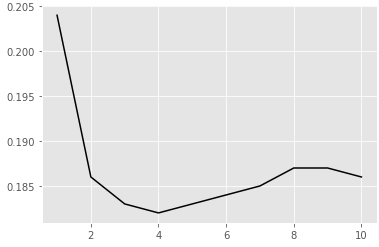

In [25]:
plt.plot(range(1, 11), neighbor_list)
plt.show()


Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

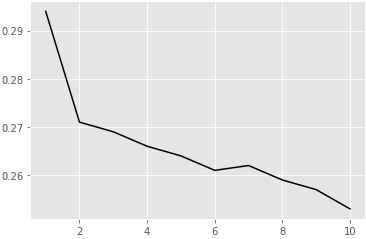

In [26]:
neighbor_list = list(neighbor_accuracy(data, target, metric='cosine'))
best_neighbor = np.argmin(np.asarray(neighbor_list)) + 1
plt.plot(range(1, 11), neighbor_list)
plt.show()


Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [27]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
X_test_raw = newsgroups['data']
y_test = newsgroups['target']
vectorizer = CountVectorizer()
X_test = vectorizer.transform(X_test_raw)


Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [28]:
model = MyKNeighborsClassifier(n_neighbors=best_neighbor)
model.fit(X, target)
score = model.score(X_test, y_test)
score
